# ANN

In [1]:
#분류ANN https://github.com/jskDr/keraspp

In [1]:
from keras import models
from keras import layers

Using TensorFlow backend.
C:\Users\KIM\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\KIM\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\KIM\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\KIM\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: Fu

In [2]:
import numpy

In [3]:
#분산 방식 모델링을 포함하는 함수형 구현:파라미터 설정 
def ANN_models_func(Nin, Nh, Nout):
    x = layers.Input(shape=(Nin,)) #입력 계층 정의
    h = layers.Activation('relu')(layers.Dense(Nh)(x)) 
    y = layers.Activation('softmax')(layers.Dense(Nout)(h))
    model = models.Model(x, y)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [4]:
def ANN_models_func(Nin, Nh, Nout):
    x = layers.Input(shape=(Nin,))
    h = layers.Activation('relu')(layers.Dense(Nh)(x))
    y = layers.Activation('softmax')(layers.Dense(Nout)(h))
    model = models.Model(x, y)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [5]:
#연쇄 방식 모델링을 포함하는 함수형 구현
def ANN_seq_func(Nin, Nh, Nout):
    model = models.Sequential() #모델 초기화
    model.add(layers.Dense(Nh, activation='relu', input_shape=(Nin,))) #모델 구조 설정
    model.add(layers.Dense(Nout, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam', metrics=['accuracy'])
    return model

In [6]:
# 분산 방식 모델링을 포함하는 객체지향형 구현
class ANN_models_class(models.Model):
    def __init__(self, Nin, Nh, Nout):
        # Prepare network layers and activate functions
        hidden = layers.Dense(Nh) #계층 정의
        output = layers.Dense(Nout) #출력 노드 정의
        relu = layers.Activation('relu')
        softmax = layers.Activation('softmax')

        # Connect network elements
        x = layers.Input(shape=(Nin,))
        h = relu(hidden(x))
        y = softmax(output(h))

        super().__init__(x, y) #상속받은 부모 클래스의 초기화 진행
        self.compile(loss='categorical_crossentropy',
                     optimizer='adam', metrics=['accuracy'])

In [7]:
#연쇄 방식 모델링을 포함하는 객체 지향형 구현 
class ANN_seq_class(models.Sequential):
    def __init__(self, Nin, Nh, Nout):
        super().__init__()
        self.add(layers.Dense(Nh, activation='relu', input_shape=(Nin,)))
        self.add(layers.Dense(Nout, activation='softmax'))
        self.compile(loss='categorical_crossentropy',
                     optimizer='adam', metrics=['accuracy'])

In [8]:
#MNIST 6만건의 필기체 숫자 데이터 불러오기
import numpy as np

In [9]:
from keras import datasets

In [10]:
from keras.utils import np_utils 

In [11]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

In [12]:
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

In [13]:
def Data_func():
    (X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

    #0~9까지 숫자로 구성된 출력값을 0과 1로 표현되는 벡터 10개로 변환
    Y_train = np_utils.to_categorical(y_train)
    Y_test = np_utils.to_categorical(y_test)

    #X_train, X_test 에 대한 3차원의 픽셀 종보를 2차원으로 조정
    L, W, H = X_train.shape 
    X_train = X_train.reshape(-1, W * H)  #-1:행렬의 행을 자동 설정
    X_test = X_test.reshape(-1, W * H)

    #정규화: 0~255 사이의 정수로 구성된 입력값을 255로 나누어 0~1사이 실수로 변환
    X_train = X_train / 255.0
    X_test = X_test / 255.0

    return (X_train, Y_train), (X_test, Y_test)

In [14]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [15]:
Data_func()

((array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]),
  array([[0., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)),
 (array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]),
  array([[0., 0., 0., ..., 1., 0., 0.],
         [0., 0., 1., ..., 0., 0., 0.],
         [0., 1., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
  

In [16]:
#분류 ANN 학습결과 그래프 구현 <- 하이퍼파라미터 조절
import matplotlib.pyplot as plt

In [17]:
#손실을 그리는 함수
def plot_loss(history):
    plt.plot(history.history['loss']) #실제 학습 데이터로 구한 손실값
    plt.plot(history.history['val_loss']) #검증 데이터로 구한 손실값
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','Test'], loc=0)

In [18]:
#정확도를 그리는 함수
def plot_acc(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','Test'], loc=0)

In [19]:
#분류 ANN 학습 빌 성능 분석
#ANN에 사용할 파라미터 정의
def main():
    Nin = 784 #길이가 784인 데이터
    Nh = 100 #은닉 계층 노드수 지정
    number_of_class = 10 #분류할 데이터의 클래스 수
    Nout = number_of_class #출력 노드 수 = 클래스 수
    model = ANN_seq_class(Nin, Nh, Nout)
    (X_train, Y_train), (X_test, Y_test) = Data_func()
    
    history = model.fit(X_train, Y_train, epochs=5, batch_size=100, validation_split=0.2)
    performace_test = model.evaluate(X_test, Y_test, batch_size=100)
    print('Test Loss and Accuracy ->', performace_test)
    
    plot_loss(history)
    plt.show()
    
    plot_acc(history)
    plt.show()


Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 1s 24us/step - loss: 0.3941 - accuracy: 0.8915 - val_loss: 0.2148 - val_accuracy: 0.9388
Epoch 2/5
48000/48000 [==============================] - 1s 20us/step - loss: 0.1861 - accuracy: 0.9467 - val_loss: 0.1607 - val_accuracy: 0.9537
Epoch 3/5
48000/48000 [==============================] - 1s 20us/step - loss: 0.1394 - accuracy: 0.9598 - val_loss: 0.1318 - val_accuracy: 0.9609
Epoch 4/5
48000/48000 [==============================] - 1s 20us/step - loss: 0.1104 - accuracy: 0.9690 - val_loss: 0.1160 - val_accuracy: 0.9671
Epoch 5/5
10000/10000 [==============================] - 0s 9us/step
Test Loss and Accuracy -> [0.11077416293788701, 0.9677000045776367]


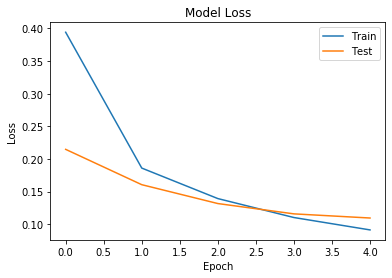

KeyError: 'acc'

In [20]:
if __name__ == '__main__':
    main()


# 회귀 ANN 모델링

In [21]:
from keras import layers, models

In [22]:
from sklearn import preprocessing

In [23]:
class ANN(models.Model):
    def __init__(self, Nin, Nh, Nout):
        # Prepare network layers and activate functions
        hidden = layers.Dense(Nh)
        output = layers.Dense(Nout)
        relu = layers.Activation('relu')

        # Connect network elements
        x = layers.Input(shape=(Nin,))
        h = relu(hidden(x))
        y = output(h)

        super().__init__(x, y)

        self.compile(loss='mse', optimizer='sgd')

In [24]:
from keras import datasets

In [25]:
(X_train, y_train), (X_test, y_test) = datasets.boston_housing.load_data()

In [26]:
scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
def Data_func():
    (X_train, y_train), (X_test, y_test) = datasets.boston_housing.load_data()
    scaler = preprocessing.MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return (X_train, y_train), (X_test, y_test)

In [28]:
from sklearn import preprocessing

In [29]:
len(X_train)

404

In [30]:
import matplotlib.pyplot as plt

In [31]:
from keraspp.skeras import plot_loss

ModuleNotFoundError: No module named 'keraspp'

In [32]:
Nin =13
Nh = 5
Nout = 1

In [33]:
(X_train, y_train), (X_test, y_test) = Data_func()

In [34]:
def main():
    Nin =13
    Nh = 5
    Nout = 1
    
    model = ANN(Nin, Nh, Nout)
    (X_train, y_train), (X_test, y_test) = Data_func()
    history = model.fit(X_train, y_train, epochs=100,
                        batch_size=100, validation_split=0.2, verbose=2)

In [35]:
if __name__ == '__main__':
    main()

Train on 323 samples, validate on 81 samples
Epoch 1/100
 - 0s - loss: 529.6114 - val_loss: 302.0353
Epoch 2/100
 - 0s - loss: 157.6668 - val_loss: 152.7323
Epoch 3/100
 - 0s - loss: 101.6210 - val_loss: 90.2721
Epoch 4/100
 - 0s - loss: 70.3784 - val_loss: 64.1706
Epoch 5/100
 - 0s - loss: 55.7555 - val_loss: 105.7244
Epoch 6/100
 - 0s - loss: 100.2295 - val_loss: 57.4787
Epoch 7/100
 - 0s - loss: 53.5322 - val_loss: 49.7406
Epoch 8/100
 - 0s - loss: 51.1739 - val_loss: 45.3656
Epoch 9/100
 - 0s - loss: 43.2108 - val_loss: 43.0089
Epoch 10/100
 - 0s - loss: 42.0649 - val_loss: 43.4222
Epoch 11/100
 - 0s - loss: 38.6215 - val_loss: 45.4517
Epoch 12/100
 - 0s - loss: 39.0573 - val_loss: 41.6101
Epoch 13/100
 - 0s - loss: 35.3543 - val_loss: 41.3285
Epoch 14/100
 - 0s - loss: 40.3799 - val_loss: 89.9412
Epoch 15/100
 - 0s - loss: 51.1954 - val_loss: 63.9267
Epoch 16/100
 - 0s - loss: 48.3650 - val_loss: 83.9580
Epoch 17/100
 - 0s - loss: 50.3653 - val_loss: 45.9837
Epoch 18/100
 - 0s - l